In [5]:
import numpy as np
from scipy import misc
from scipy import ndimage
from scipy.ndimage.interpolation import geometric_transform

import matplotlib.pyplot as plt

(191L, 226L)


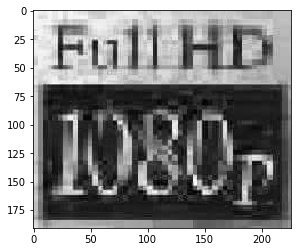

In [2]:
img = misc.imread('1080p.jpg', flatten=True)
print img.shape
lx, ly = img.shape

plt.imshow(img, cmap='gray')
plt.show()

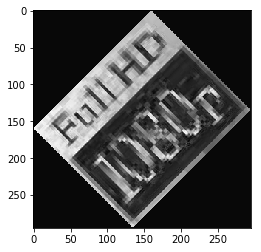

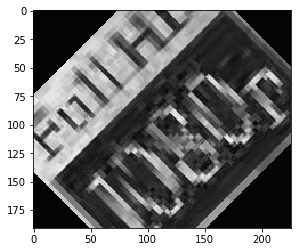

In [4]:
# Cropping
crop_img = img[lx / 4: - lx / 4, ly / 4: - ly / 4]
# up <-> down flip
flip_ud_img = np.flipud(img)
# rotation
rotate_img = ndimage.rotate(img, 45)
rotate_img_noreshape = ndimage.rotate(img, 45, reshape=False)

plt.imshow(rotate_img, cmap='gray')
plt.show()

plt.imshow(rotate_img_noreshape, cmap='gray')
plt.show()

In [7]:
def perspective ( fovy, aspect, near, far ):
    f = 1.0 / np.tan( np.radians(fovy) / 2 )
    d = far - near

    mat = np.zeros((4,4))
    mat[0][0] = f / aspect
    mat[1][1] = f
    mat[2][2] = -(near + far) / d
    mat[2][3] = -2 * near * far / d
    mat[3][2] = -1
    mat[3][3] = 0.0

    return mat

perspective( 90,1,1,100 )

array([[ 1.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.],
       [ 0.,  0., -2., -3.],
       [ 0.,  0., -1.,  0.]])

In [11]:
def rotate3D (angle, axis):

    x,y,z = axis/np.linalg.norm(axis) # normalize axis

    cos = np.cos( np.radians(angle) );
    omc = 1.0 - cos;
    sin = np.sin( np.radians(angle) );
    
    return np.matrix([[x*x*omc + cos, x*y*omc - z*sin, x*z*omc + y*sin, 0],
                      [x*y*omc + z*sin, y*y*omc + cos, y*z*omc - x*sin, 0],
                      [x*z*omc - y*sin, y*z*omc + x*sin, z*z*omc + cos, 0],
                      [0,0,0,1]])

rotate3D (30, [1,1,2])

matrix([[ 0.8883545 , -0.38591919,  0.24878234,  0.        ],
        [ 0.43057739,  0.8883545 , -0.15946595,  0.        ],
        [-0.15946595,  0.24878234,  0.9553418 ,  0.        ],
        [ 0.        ,  0.        ,  0.        ,  1.        ]])

In [ ]:
perspective_img = geometric_transform(np.dot(perspective(45, lx*1./ly, 0.1, -1))

plt.imshow(perspective_img, cmap='gray')
plt.show()